In [2]:
from google.colab import files

uploaded = files.upload()

Saving crime_data.csv to crime_data.csv


In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
df1= pd.read_csv("crime_data.csv")

In [58]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [59]:
df1.shape

(50, 5)

In [60]:
df1.isnull().any()

Unnamed: 0    False
Murder        False
Assault       False
UrbanPop      False
Rape          False
dtype: bool

In [61]:
df1.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


array([[<Axes: title={'center': 'Murder'}>,
        <Axes: title={'center': 'Assault'}>],
       [<Axes: title={'center': 'UrbanPop'}>,
        <Axes: title={'center': 'Rape'}>]], dtype=object)

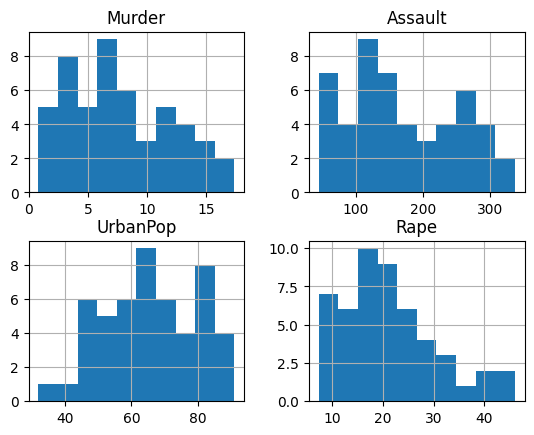

In [62]:
df1.hist()

<Axes: >

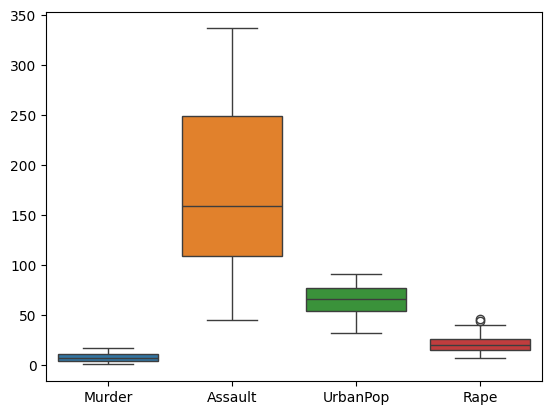

In [63]:
sns.boxplot(df1)
#clean data no outliers


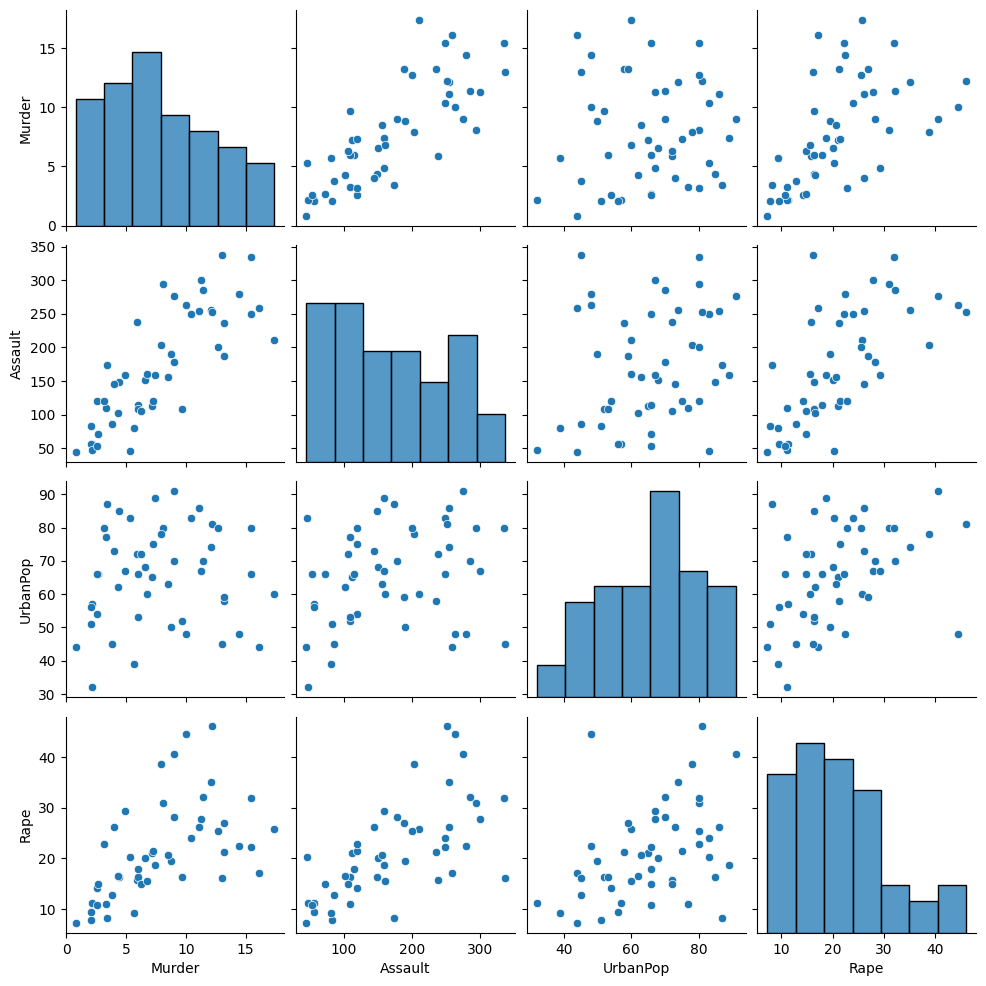

In [64]:
sns.pairplot(data=df1)

#3d view for the 4 veriabls

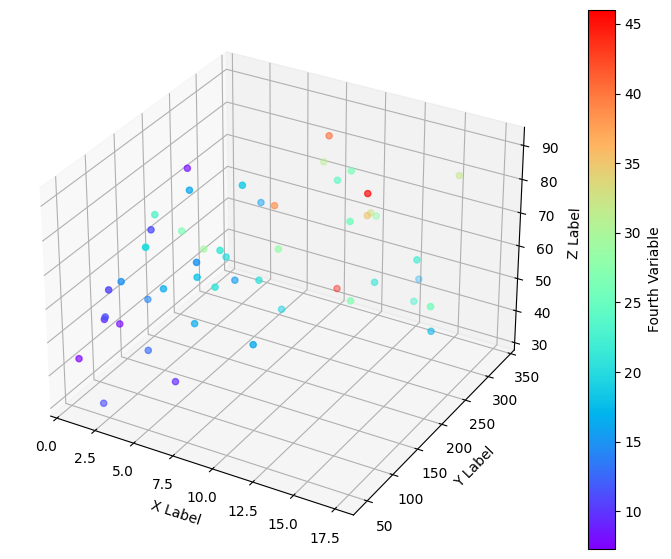

In [65]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

x = df1.iloc[:, 1]  # First variable
y = df1.iloc[:, 2]  # Second variable
z = df1.iloc[:, 3]  # Third variable
c = df1.iloc[:, 4]  # Fourth variable, used for color

scatter = ax.scatter(x, y, z, c=c, cmap='rainbow')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.colorbar(scatter, label='Fourth Variable')
plt.show()

In [66]:
X=df1.iloc[:,1:5]

In [67]:
#from sklearn.preprocessing import StandardScaler
#SS = StandardScaler()
#X= SS.fit_transform(X)

In [68]:
#Normalized data fuction
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [69]:
X=norm_func(df1.iloc[:,1:])

#Hierarchal Method
#Aglomerative clustering


In [70]:
#by single linkage method
from sklearn.cluster  import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=3,
                                affinity='euclidean',
                                linkage= 'single')
clusters= cluster.fit_predict(X)
clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [71]:
Y= pd.DataFrame(clusters)
Y.value_counts()

0    48
1     1
2     1
dtype: int64

In [72]:
#by complete linkage method
from sklearn.cluster  import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=3,
                                affinity='euclidean',
                                linkage= 'complete')
clusters= cluster.fit_predict(X)
clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 1, 1])

In [73]:
Y1= pd.DataFrame(clusters)
Y1.value_counts()

0    20
1    20
2    10
dtype: int64

#here we can see complete cluster  showing better result for Hierarchical clustering


In [74]:
df1['C_Cluster']=cluster.labels_
df1.head(10)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,C_Cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


# KMeans

In [75]:
df2= pd.read_csv("crime_data.csv")

In [76]:
X=df2.iloc[:,1:5]

In [87]:
from sklearn.cluster import KMeans
Kmeans=KMeans(n_clusters=3 , n_init = 20)

clusters1=Kmeans.fit_predict(X)
clusters1

array([0, 0, 0, 2, 0, 2, 1, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 2, 0,
       1, 0, 2, 1, 1, 0, 1, 2, 0, 0, 0, 1, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1,
       1, 2, 2, 1, 1, 2], dtype=int32)

In [90]:
Y2= pd.DataFrame(clusters1)
Y2.value_counts()

1    20
0    16
2    14
dtype: int64

In [91]:
Kmeans.inertia_

47964.26535714285

#Checking  Elbow curve which Kmeans value  good for the data

In [92]:
j=[]
for i in range(1,11):
  from sklearn.cluster import KMeans
  Kmeans=KMeans(n_clusters=i , n_init = 20)
  Kmeans.fit_predict(X)
  j.append(Kmeans.inertia_)

j



[355807.8216,
 96399.02814449917,
 47964.26535714285,
 34728.629357142854,
 24417.02352380952,
 18768.000666666667,
 15463.47377777778,
 13329.361976190477,
 11125.033809523808,
 10211.331309523808]

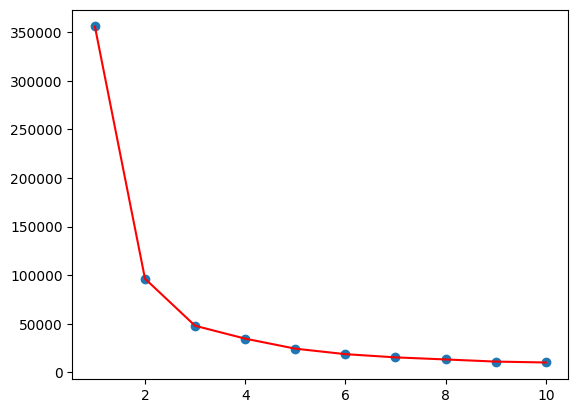

In [93]:
plt.scatter(range(1,11),j)
plt.plot(range(1,11),j,color='red')
plt.show()

# By this curve we can understand that 4 cluster would be great  for this data set

In [94]:
from sklearn.cluster import KMeans
Kmeans=KMeans(n_clusters=4 , n_init = 20)

clusters1=Kmeans.fit_predict(X)
clusters1

array([1, 1, 1, 3, 1, 3, 0, 1, 1, 3, 2, 0, 1, 0, 2, 0, 0, 1, 2, 1, 3, 1,
       2, 1, 3, 0, 0, 1, 2, 3, 1, 1, 1, 2, 0, 3, 3, 0, 3, 1, 2, 3, 3, 0,
       2, 3, 3, 2, 2, 3], dtype=int32)

In [95]:
Y2= pd.DataFrame(clusters1)
Y2.value_counts()

1    16
3    14
0    10
2    10
dtype: int64

In [96]:
Kmeans.inertia_

34728.629357142854

In [97]:
df2['Kmeans_Cluster']=Kmeans.labels_
df2.head(10)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Kmeans_Cluster
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [99]:
df2.iloc[:,1:5].groupby(df2.Kmeans_Cluster).mean()

,Murder,Assault,UrbanPop,Rape
Kmeans_Cluster,,,,
0,5.590000,112.400000,65.600000,17.270000
1,11.812500,272.562500,68.312500,28.375000
2,2.950000,62.700000,53.900000,11.510000
3,8.214286,173.285714,70.642857,22.842857


#DBSCAN(DENSITY BASED SPATIAL CLUSTERING OF APPLICATION  WITH NOISE)

In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
df3= pd.read_csv("crime_data.csv")

In [115]:
X=df3.iloc[:,1:5]

In [116]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X= SS.fit_transform(X)

In [132]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps= 2, min_samples=5)
model=dbscan.fit_predict(X)


In [133]:
model

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [135]:
df3['dbscan_Cluster']=dbscan.labels_
df3.head(10)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,dbscan_Cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


#Aftr doing the DBSCAN and tried with different parameter i observed this value

#Now after performing the all 3 clustering method, for this data set target veriable is ready now we can perform any model building technique to get the result. here i am not doing because in question they only need to see the cluster values.